# Cleansing and Processing

In [2]:
import numpy as np
import pandas as pd

In [3]:
NASA_df = pd.read_csv('Data/NASA.csv')

In [4]:
NASA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        199 non-null    int64  
 1   text                           197 non-null    object 
 2   post_text                      189 non-null    object 
 3   shared_text                    42 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           199 non-null    object 
 6   timestamp                      199 non-null    int64  
 7   image                          84 non-null     object 
 8   image_lowquality               199 non-null    object 
 9   images                         199 non-null    object 
 10  images_description             199 non-null    object 
 11  images_lowquality              199 non-null    object 
 12  images_lowquality_description  199 non-null    obj

In [5]:
NASA_df2 = pd.read_csv("Data/NASA2.csv")

In [6]:
NASA_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   original_request_url           338 non-null    object 
 1   post_url                       338 non-null    object 
 2   post_id                        338 non-null    object 
 3   text                           338 non-null    object 
 4   post_text                      323 non-null    object 
 5   shared_text                    98 non-null     object 
 6   original_text                  1 non-null      object 
 7   time                           338 non-null    object 
 8   timestamp                      333 non-null    float64
 9   image                          134 non-null    object 
 10  image_lowquality               338 non-null    object 
 11  images                         338 non-null    object 
 12  images_description             338 non-null    obj

In [7]:
useful = ['post_url','text', 'time', 'comments', 'shares', 'link', 'links', 'username', 'comments_full',
          'reactions', 'reaction_count', 'was_live']
NASA_final_df = NASA_df2[useful]
NASA_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_url        338 non-null    object 
 1   text            338 non-null    object 
 2   time            338 non-null    object 
 3   comments        336 non-null    float64
 4   shares          338 non-null    int64  
 5   link            312 non-null    object 
 6   links           338 non-null    object 
 7   username        338 non-null    object 
 8   comments_full   338 non-null    object 
 9   reactions       338 non-null    object 
 10  reaction_count  338 non-null    int64  
 11  was_live        336 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 31.8+ KB


In [42]:
NASA_final_df['time'] = pd.to_datetime(NASA_final_df['time'])
NASA_final_df['date'] = NASA_final_df['time'].dt.date
NASA_final_df['hours'] = NASA_final_df['time'].dt.hour

In [10]:
NASA_final_df.duplicated().sum()

0

In [11]:
NASA_final_df.isnull().sum()

post_url           0
text               0
time               0
comments           2
shares             0
link              26
links              0
username           0
comments_full      0
reactions          0
reaction_count     0
was_live           2
date               0
dtype: int64

In [12]:
not_empty = NASA_final_df[NASA_final_df['comments_full'].apply(lambda x : (len(x) > 2))]
not_empty.shape

(79, 13)

In [13]:
NASA_final_df['comments_full'] = NASA_final_df['comments_full'].replace('[]', None)
NASA_final_df = NASA_final_df.fillna(NASA_df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9464\3148922942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASA_final_df['comments_full'] = NASA_final_df['comments_full'].replace('[]', None)


In [14]:
NASA_final_df['comments_full'] = NASA_final_df['comments_full'].fillna('[]')
NASA_final_df['comments_full'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 338 entries, 0 to 337
Series name: comments_full
Non-Null Count  Dtype 
--------------  ----- 
338 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


In [15]:
not_empty = NASA_final_df[NASA_final_df['comments_full'].apply(lambda x : (len(x) > 2))]
not_empty.shape

(125, 13)

In [16]:
NASA_final_df['comments'] = NASA_final_df['comments'].fillna(0)
NASA_final_df['link'] = NASA_final_df['link'].fillna('')

In [17]:
NASA_final_df['time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 338 entries, 0 to 337
Series name: time
Non-Null Count  Dtype         
--------------  -----         
338 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 KB


In [18]:
NASA_final_df.to_csv('Data/NASA_final.csv',index=False)

# Analysis
## Basic analysis

In [19]:
NASA = NASA_final_df
NASA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_url        338 non-null    object        
 1   text            338 non-null    object        
 2   time            338 non-null    datetime64[ns]
 3   comments        338 non-null    float64       
 4   shares          338 non-null    int64         
 5   link            338 non-null    object        
 6   links           338 non-null    object        
 7   username        338 non-null    object        
 8   comments_full   338 non-null    object        
 9   reactions       338 non-null    object        
 10  reaction_count  338 non-null    int64         
 11  was_live        337 non-null    object        
 12  date            338 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 34.5+ KB


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
date_related = NASA[['date', 'comments', 'shares', 'reaction_count']]
date_related = pd.DataFrame(date_related.groupby(['date']).sum())
date_related

,comments,shares,reaction_count
date,,,
2023-05-13,611.0,693,7890
2023-05-15,171.0,250,2437
2023-05-16,280.0,222,2218
2023-05-17,1602.0,710,5590
2023-05-18,406.0,337,4258
...,...,...,...
2023-11-21,731.0,1780,10285
2023-11-22,708.0,738,6454
2023-11-23,1370.0,464,6206


### Looking at the distributions

In [22]:
# The beginning and the end of all the date
begin_date = date_related.index[0]
end_date = date_related.index[-1]

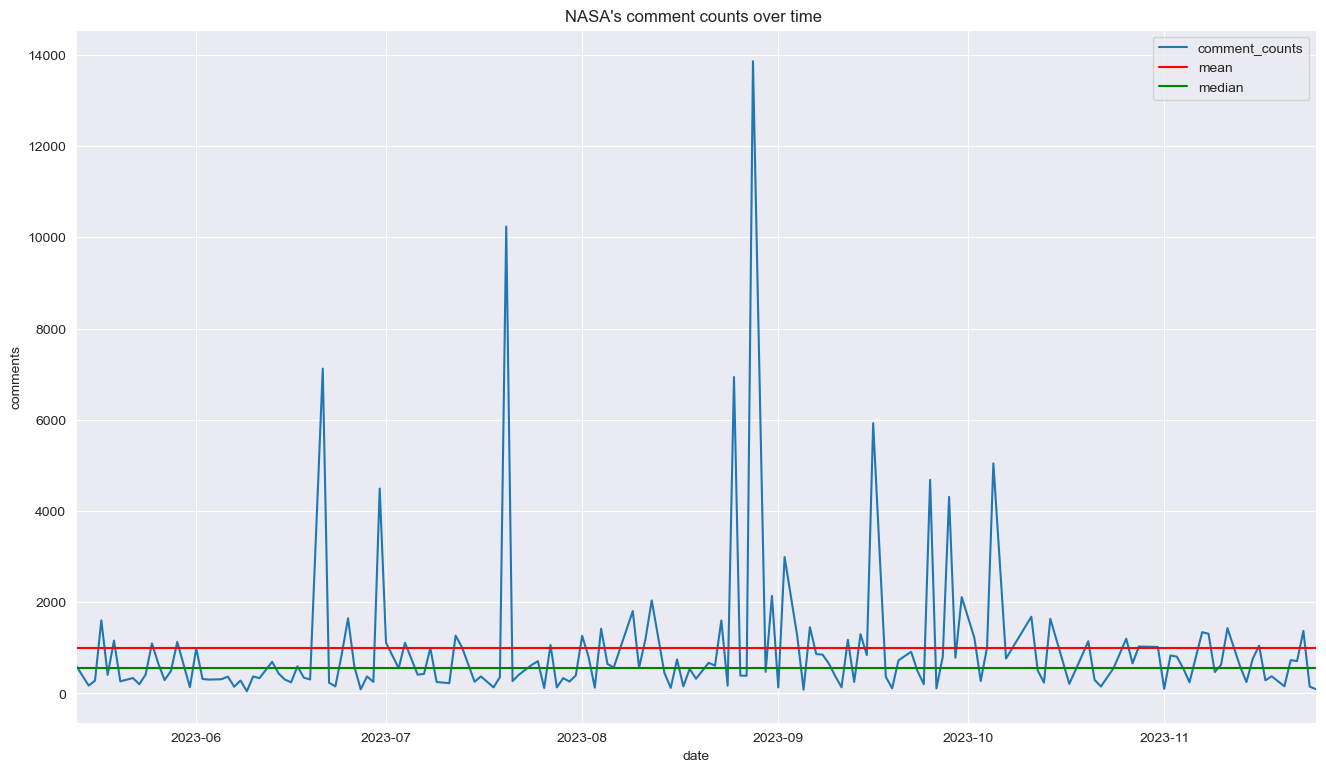

In [23]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.lineplot(data=date_related['comments'], ax = ax)

mean_comment = date_related['comments'].mean()
med_comment = date_related['comments'].median()

plt.axhline(y=mean_comment, color='red')
plt.axhline(y=med_comment, color='green')

plt.xlim(begin_date,end_date)
plt.title('NASA\'s comment counts over time ')
plt.legend(labels=['comment_counts', 'mean', 'median'])

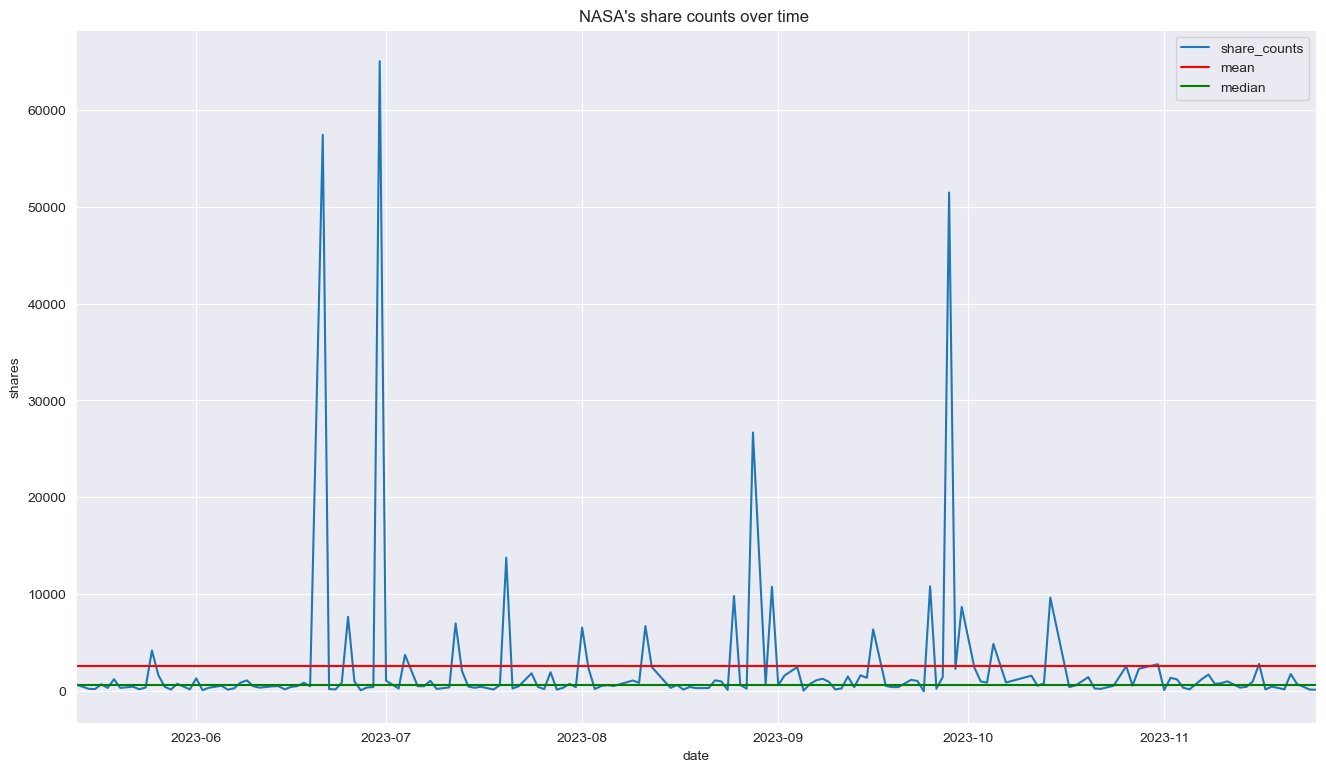

In [40]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.lineplot(data=date_related['shares'], ax = ax)

mean_share = date_related['shares'].mean()
med_share = date_related['shares'].median()

plt.axhline(y=mean_share, color='red')
plt.axhline(y=med_share, color='green')

plt.xlim(begin_date,end_date)
plt.title('NASA\'s share counts over time ')
plt.legend(labels=['share_counts', 'mean', 'median'])

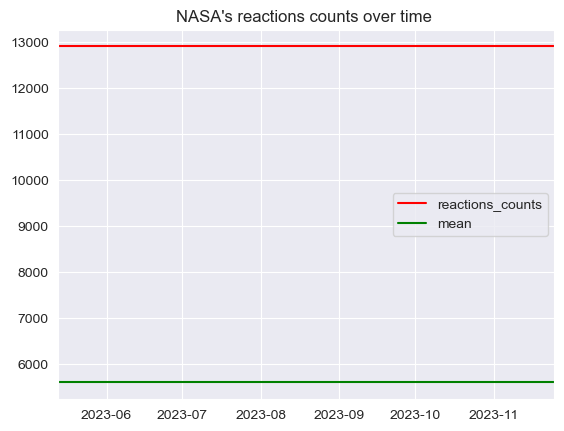

In [41]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(data=date_related['reaction_count'], ax = ax)
plt.legend(labels=['reaction_count'])

mean_reacts = date_related['reaction_count'].mean()
med_reacts = date_related['reaction_count'].median()

plt.axhline(y=mean_reacts, color='red')
plt.axhline(y=med_reacts, color='green')

plt.xlim(begin_date,end_date)
plt.title('NASA\'s reactions counts over time ')
plt.legend(labels=['reactions_counts', 'mean', 'median'])

### Finding and analyze the outlier

In [26]:
# find outlier
outlier_comment = date_related[date_related['comments'] > mean_comment + 2 * date_related['comments'].std()]
outlier_comment

,comments,shares,reaction_count
date,,,
2023-06-21,7121.0,57394,209978
2023-06-30,4491.0,64998,150481
2023-07-20,10236.0,13777,65103
2023-08-25,6936.0,9821,25310
2023-08-28,13860.0,26693,70133
2023-09-16,5925.0,6378,50939
2023-09-25,4682.0,10824,72748
2023-10-05,5044.0,4877,38231


In [27]:
# Find all the posts in all the days that have sudden grow of numbers
outlier_posts_comment = NASA[NASA['time'].dt.date.isin(pd.Series(outlier_comment.index))]
outlier_posts_comment

,post_url,text,time,comments,shares,link,links,username,comments_full,reactions,reaction_count,was_live,date
67,https://facebook.com/story.php?story_fbid=9501...,Watch live with us as a “ring of fire” eclipse...,2023-08-28 21:18:08,13538.0,26076,https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...,[{'link': '/hashtag/asknasa?refid=52&__tn__=%2...,NASA - National Aeronautics and Space Administ...,[],"{'like': 44940, 'love': 19860, 'haha': 121, 'w...",66340,True,2023-08-28
71,https://facebook.com/story.php?story_fbid=1324...,Watch the Psyche spacecraft launch from NASA’s...,2023-10-05 21:57:35,2752.0,2686,https://spaceplace.nasa.gov/psyche-launch-bing...,[],NASA - National Aeronautics and Space Administ...,[],"{'like': 12946, 'love': 3944, 'haha': 108, 'wo...",17320,True,2023-10-05
77,https://facebook.com/story.php?story_fbid=1115...,Watch as the first asteroid sample collected i...,2023-10-05 03:28:27,1901.0,2144,https://science.nasa.gov/mission/osiris-rex/?f...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 12077, 'love': 3344, 'haha': 145, 'wo...",15881,True,2023-10-05
82,https://m.facebook.com/NASA/posts/860674359085886,"FRI, 13 OCT\nPsyche Launches to a Metal Astero...",2023-10-05 22:06:52,187.0,47,https://go.nasa.gov/48CRuhP?fbclid=IwAR1QSP67D...,[{'link': '/events/feed/watch/?feed_data%5Brep...,NASA - National Aeronautics and Space Administ...,[],"{'like': 1172, 'love': 197, 'haha': 18, 'wow':...",1414,True,2023-10-05
83,https://m.facebook.com/NASA/posts/999840931284213,"WED, 11 OCT\nRevealing the OSIRIS-REx Asteroid...",2023-10-05 05:43:17,204.0,0,https://science.nasa.gov/skywatching/whats-up/...,[{'link': '/events/feed/watch/?feed_data%5Brep...,NASA - National Aeronautics and Space Administ...,[],"{'like': 3092, 'love': 420, 'haha': 46, 'wow':...",3616,True,2023-10-05
97,https://facebook.com/story.php?story_fbid=1031...,"On Sunday, Sept. 24, 2023, NASA’s OSIRIS-REx s...",2023-09-25 21:16:43,662.0,366,https://blogs.nasa.gov/osiris-rex?fbclid=IwAR2...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 2506, 'love': 543, 'haha': 32, 'wow':...",3138,True,2023-09-25
99,https://facebook.com/story.php?story_fbid=pfbi...,"We're only a few weeks away from the ""ring of ...",2023-09-25 23:25:37,932.0,5950,https://go.nasa.gov/3t4VMym?fbclid=IwAR1lTTUIg...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 14144, 'love': 5425, 'haha': 31, 'wow...",20110,False,2023-09-25
100,https://m.facebook.com/NASA/posts/338299975321523,"TUES, 26 SEP\nNASA Science Live: Ask Your Ques...",2023-09-25 21:18:33,143.0,0,http://nasa.gov/subscribe?fbclid=IwAR3s8YkXkUh...,[{'link': '/events/feed/watch/?feed_data%5Brep...,NASA - National Aeronautics and Space Administ...,[],"{'like': 1261, 'love': 220, 'haha': 8, 'wow': ...",1521,True,2023-09-25
101,https://facebook.com/story.php?story_fbid=pfbi...,Today's OSIRIS-REx asteroid sample landing isn...,2023-09-25 06:07:16,2945.0,4508,http://go.nasa.gov/48tadwj?fbclid=IwAR08OuszrU...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 39204, 'love': 5650, 'haha': 1335, 'w...",47979,False,2023-09-25
102,https://facebook.com/story.php?story_fbid=6309...,Watch a spacecraft deliver an asteroid sample ...,2023-09-16 03:20:11,4166.0,4987,https://www.nasa.gov/feature/goddard/2022/surp...,[],NASA - National Aeronautics and Space Administ...,[],"{'like': 25450, 'love': 6389, 'haha': 266, 'wo...",32793,True,2023-09-16


In [28]:
outlier_posts_comment['date'].value_counts()

2023-09-16    8
2023-10-05    4
2023-09-25    4
2023-08-25    4
2023-08-28    3
2023-06-30    3
2023-06-21    3
2023-07-20    2
Name: date, dtype: int64

In [29]:
outlier_posts_comment[outlier_posts_comment['comments'] > mean_comment]

,post_url,text,time,comments,shares,link,links,username,comments_full,reactions,reaction_count,was_live,date
67,https://facebook.com/story.php?story_fbid=9501...,Watch live with us as a “ring of fire” eclipse...,2023-08-28 21:18:08,13538.0,26076,https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...,[{'link': '/hashtag/asknasa?refid=52&__tn__=%2...,NASA - National Aeronautics and Space Administ...,[],"{'like': 44940, 'love': 19860, 'haha': 121, 'w...",66340,True,2023-08-28
71,https://facebook.com/story.php?story_fbid=1324...,Watch the Psyche spacecraft launch from NASA’s...,2023-10-05 21:57:35,2752.0,2686,https://spaceplace.nasa.gov/psyche-launch-bing...,[],NASA - National Aeronautics and Space Administ...,[],"{'like': 12946, 'love': 3944, 'haha': 108, 'wo...",17320,True,2023-10-05
77,https://facebook.com/story.php?story_fbid=1115...,Watch as the first asteroid sample collected i...,2023-10-05 03:28:27,1901.0,2144,https://science.nasa.gov/mission/osiris-rex/?f...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 12077, 'love': 3344, 'haha': 145, 'wo...",15881,True,2023-10-05
101,https://facebook.com/story.php?story_fbid=pfbi...,Today's OSIRIS-REx asteroid sample landing isn...,2023-09-25 06:07:16,2945.0,4508,http://go.nasa.gov/48tadwj?fbclid=IwAR08OuszrU...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 39204, 'love': 5650, 'haha': 1335, 'w...",47979,False,2023-09-25
102,https://facebook.com/story.php?story_fbid=6309...,Watch a spacecraft deliver an asteroid sample ...,2023-09-16 03:20:11,4166.0,4987,https://www.nasa.gov/feature/goddard/2022/surp...,[],NASA - National Aeronautics and Space Administ...,[],"{'like': 25450, 'love': 6389, 'haha': 266, 'wo...",32793,True,2023-09-16
162,https://facebook.com/story.php?story_fbid=2581...,Watch live with us as a crew of four launch on...,2023-08-25 10:10:52,2638.0,1419,https://www.nasa.gov/feature/what-you-need-to-...,[{'link': '/hashtag/crew7?refid=52&__tn__=%2As...,NASA - National Aeronautics and Space Administ...,[],"{'like': 5684, 'love': 2052, 'haha': 61, 'wow'...",7952,True,2023-08-25
166,https://facebook.com/story.php?story_fbid=pfbi...,"From: space\nTo: your school, library, or muse...",2023-08-25 02:17:57,3975.0,8081,https://go.nasa.gov/47FLQLD?fbclid=IwAR0Gd3-eM...,[{'link': '/hashtag/moontree?__tn__=%2As-R&pai...,NASA - National Aeronautics and Space Administ...,[],"{'like': 9854, 'love': 3032, 'haha': 67, 'wow'...",14213,False,2023-08-25
224,https://facebook.com/story.php?story_fbid=pfbi...,"One small step.\n\nOn this day 54 years ago, A...",2023-07-20 23:49:38,10182.0,13642,http://www.nasa.gov/artemis?fbclid=IwAR1gB7dEv...,[{'link': '/NASAArtemis?eav=AfauJfqCy-haYR0SZ-...,NASA - National Aeronautics and Space Administ...,[],"{'like': 42029, 'love': 13009, 'haha': 7916, '...",63832,False,2023-07-20
256,https://facebook.com/story.php?story_fbid=pfbi...,"Wake up, babe. NASA's James Webb Space Telesco...",2023-06-30 23:51:12,3936.0,63257,https://go.nasa.gov/3px3VKE?fbclid=IwAR1sgpXgk...,[{'link': '/NASAWebb?eav=AfZoYBbIzGbV5AH367r2n...,NASA - National Aeronautics and Space Administ...,[],"{'like': 38336, 'love': 93026, 'haha': 285, 'w...",136631,False,2023-06-30
274,https://facebook.com/story.php?story_fbid=pfbi...,Hear that? That’s the sound of space.\n\nWe’ve...,2023-06-21 03:22:00,6734.0,55947,https://go.nasa.gov/46hjd6S?fbclid=IwAR1pjnJdE...,[{'link': '/chandraxrayobservatory?eav=AfZe37J...,NASA - National Aeronautics and Space Administ...,[],"{'like': 76402, 'love': 94196, 'haha': 1086, '...",202242,False,2023-06-21


In [30]:
# find outlier
outlier_share = date_related[date_related['shares'] > mean_share + 2 * date_related['shares'].std()]
outlier_share

,comments,shares,reaction_count
date,,,
2023-06-21,7121.0,57394,209978
2023-06-30,4491.0,64998,150481
2023-08-28,13860.0,26693,70133
2023-09-28,4308.0,51446,150505


In [31]:
outlier_posts_share = NASA[NASA['time'].dt.date.isin(pd.Series(outlier_share.index))]
outlier_posts_share

,post_url,text,time,comments,shares,link,links,username,comments_full,reactions,reaction_count,was_live,date
67,https://facebook.com/story.php?story_fbid=9501...,Watch live with us as a “ring of fire” eclipse...,2023-08-28 21:18:08,13538.0,26076,https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...,[{'link': '/hashtag/asknasa?refid=52&__tn__=%2...,NASA - National Aeronautics and Space Administ...,[],"{'like': 44940, 'love': 19860, 'haha': 121, 'w...",66340,True,2023-08-28
94,https://facebook.com/story.php?story_fbid=pfbi...,Carolina Rudisel would have never imagined she...,2023-09-28 03:26:21,1.0,28,https://www.nasa.gov/faces-of-nasa/carolina-ru...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,"[{'comment_id': '585501493626102', 'comment_ur...","{'like': 670, 'love': 143, 'haha': 3, 'wow': 7...",832,False,2023-09-28
95,https://facebook.com/story.php?story_fbid=pfbi...,"Welcome home, Frank!\n\nAfter a record-breakin...",2023-09-28 01:09:31,4307.0,51418,https://go.nasa.gov/3ZwrCQA?fbclid=IwAR0GlI0Vg...,[{'link': '/ISS?eav=AfbLQvJv-3_W_AVOuU6Z3PaeA3...,NASA - National Aeronautics and Space Administ...,[],"{'like': 55254, 'love': 86757, 'haha': 560, 'w...",149673,False,2023-09-28
158,https://facebook.com/story.php?story_fbid=pfbi...,"Save the date for a solar eclipse: On Oct. 14,...",2023-08-28 21:26:43,247.0,617,https://fb.me/e/8oN0ufeG6,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 1465, 'love': 395, 'haha': 6, 'wow': ...",1919,False,2023-08-28
159,https://m.facebook.com/NASA/posts/257401430535836,"SAT, 14 OCT\nThe Ring of Fire: 2023 Annular So...",2023-08-28 21:30:20,75.0,0,https://media1.tenor.co/m/_zTvAtDWeEMAAAAd/gol...,[{'link': '/events/feed/watch/?feed_data%5Brep...,NASA - National Aeronautics and Space Administ...,"[{'comment_id': '257659173843395', 'comment_ur...","{'like': 1547, 'love': 283, 'haha': 7, 'wow': ...",1874,True,2023-08-28
254,https://facebook.com/story.php?story_fbid=pfbi...,Say hi to the sky in July!\n\nA full moon star...,2023-06-30 03:14:58,194.0,1085,http://go.nasa.gov/whatsup?fbclid=IwAR1NvN2XMl...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 3952, 'love': 1346, 'haha': 26, 'wow'...",5420,False,2023-06-30
256,https://facebook.com/story.php?story_fbid=pfbi...,"Wake up, babe. NASA's James Webb Space Telesco...",2023-06-30 23:51:12,3936.0,63257,https://go.nasa.gov/3px3VKE?fbclid=IwAR1sgpXgk...,[{'link': '/NASAWebb?eav=AfZoYBbIzGbV5AH367r2n...,NASA - National Aeronautics and Space Administ...,[],"{'like': 38336, 'love': 93026, 'haha': 285, 'w...",136631,False,2023-06-30
258,https://facebook.com/story.php?story_fbid=pfbi...,Galaxies aren't randomly scattered throughout ...,2023-06-30 00:54:59,361.0,656,https://go.nasa.gov/3PCFRR5?fbclid=IwAR1Riw5bR...,[{'link': '/NASAWebb?eav=AfYYNGkq0svr_wowRuh-W...,NASA - National Aeronautics and Space Administ...,[],"{'like': 6157, 'love': 2000, 'haha': 32, 'wow'...",8430,False,2023-06-30
271,https://facebook.com/story.php?story_fbid=pfbi...,Are there earthquakes on other planets? There ...,2023-06-21 03:52:44,154.0,168,https://go.nasa.gov/3N68hP1?fbclid=IwAR04h0J8h...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 1415, 'love': 185, 'haha': 18, 'wow':...",1645,False,2023-06-21
272,https://facebook.com/story.php?story_fbid=pfbi...,"Oh, those summer nights! It's the #SummerSolst...",2023-06-21 22:16:38,233.0,1279,https://go.nasa.gov/42QYJP5?fbclid=IwAR2yo3F7-...,[{'link': '/hashtag/summersolstice?__tn__=%2As...,NASA - National Aeronautics and Space Administ...,[],"{'like': 4642, 'love': 1326, 'haha': 16, 'wow'...",6091,False,2023-06-21


In [32]:
outlier_posts_share['date'].value_counts()

2023-08-28    3
2023-06-30    3
2023-06-21    3
2023-09-28    2
Name: date, dtype: int64

In [33]:
outlier_posts_share[outlier_posts_share['shares'] > mean_share]
# Cosmology event

,post_url,text,time,comments,shares,link,links,username,comments_full,reactions,reaction_count,was_live,date
67,https://facebook.com/story.php?story_fbid=9501...,Watch live with us as a “ring of fire” eclipse...,2023-08-28 21:18:08,13538.0,26076,https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...,[{'link': '/hashtag/asknasa?refid=52&__tn__=%2...,NASA - National Aeronautics and Space Administ...,[],"{'like': 44940, 'love': 19860, 'haha': 121, 'w...",66340,True,2023-08-28
95,https://facebook.com/story.php?story_fbid=pfbi...,"Welcome home, Frank!\n\nAfter a record-breakin...",2023-09-28 01:09:31,4307.0,51418,https://go.nasa.gov/3ZwrCQA?fbclid=IwAR0GlI0Vg...,[{'link': '/ISS?eav=AfbLQvJv-3_W_AVOuU6Z3PaeA3...,NASA - National Aeronautics and Space Administ...,[],"{'like': 55254, 'love': 86757, 'haha': 560, 'w...",149673,False,2023-09-28
256,https://facebook.com/story.php?story_fbid=pfbi...,"Wake up, babe. NASA's James Webb Space Telesco...",2023-06-30 23:51:12,3936.0,63257,https://go.nasa.gov/3px3VKE?fbclid=IwAR1sgpXgk...,[{'link': '/NASAWebb?eav=AfZoYBbIzGbV5AH367r2n...,NASA - National Aeronautics and Space Administ...,[],"{'like': 38336, 'love': 93026, 'haha': 285, 'w...",136631,False,2023-06-30
274,https://facebook.com/story.php?story_fbid=pfbi...,Hear that? That’s the sound of space.\n\nWe’ve...,2023-06-21 03:22:00,6734.0,55947,https://go.nasa.gov/46hjd6S?fbclid=IwAR1pjnJdE...,[{'link': '/chandraxrayobservatory?eav=AfZe37J...,NASA - National Aeronautics and Space Administ...,[],"{'like': 76402, 'love': 94196, 'haha': 1086, '...",202242,False,2023-06-21


In [34]:
outlier_reaction = date_related[date_related['reaction_count'] > mean_reacts + 2 * date_related['reaction_count'].std()]
outlier_reaction

,comments,shares,reaction_count
date,,,
2023-06-21,7121.0,57394,209978
2023-06-30,4491.0,64998,150481
2023-07-20,10236.0,13777,65103
2023-08-28,13860.0,26693,70133
2023-09-25,4682.0,10824,72748
2023-09-28,4308.0,51446,150505


In [35]:
outlier_posts_reactions = NASA[NASA['time'].dt.date.isin(pd.Series(outlier_reaction.index)) ]
outlier_posts_reactions

,post_url,text,time,comments,shares,link,links,username,comments_full,reactions,reaction_count,was_live,date
67,https://facebook.com/story.php?story_fbid=9501...,Watch live with us as a “ring of fire” eclipse...,2023-08-28 21:18:08,13538.0,26076,https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...,[{'link': '/hashtag/asknasa?refid=52&__tn__=%2...,NASA - National Aeronautics and Space Administ...,[],"{'like': 44940, 'love': 19860, 'haha': 121, 'w...",66340,True,2023-08-28
94,https://facebook.com/story.php?story_fbid=pfbi...,Carolina Rudisel would have never imagined she...,2023-09-28 03:26:21,1.0,28,https://www.nasa.gov/faces-of-nasa/carolina-ru...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,"[{'comment_id': '585501493626102', 'comment_ur...","{'like': 670, 'love': 143, 'haha': 3, 'wow': 7...",832,False,2023-09-28
95,https://facebook.com/story.php?story_fbid=pfbi...,"Welcome home, Frank!\n\nAfter a record-breakin...",2023-09-28 01:09:31,4307.0,51418,https://go.nasa.gov/3ZwrCQA?fbclid=IwAR0GlI0Vg...,[{'link': '/ISS?eav=AfbLQvJv-3_W_AVOuU6Z3PaeA3...,NASA - National Aeronautics and Space Administ...,[],"{'like': 55254, 'love': 86757, 'haha': 560, 'w...",149673,False,2023-09-28
97,https://facebook.com/story.php?story_fbid=1031...,"On Sunday, Sept. 24, 2023, NASA’s OSIRIS-REx s...",2023-09-25 21:16:43,662.0,366,https://blogs.nasa.gov/osiris-rex?fbclid=IwAR2...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 2506, 'love': 543, 'haha': 32, 'wow':...",3138,True,2023-09-25
99,https://facebook.com/story.php?story_fbid=pfbi...,"We're only a few weeks away from the ""ring of ...",2023-09-25 23:25:37,932.0,5950,https://go.nasa.gov/3t4VMym?fbclid=IwAR1lTTUIg...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 14144, 'love': 5425, 'haha': 31, 'wow...",20110,False,2023-09-25
100,https://m.facebook.com/NASA/posts/338299975321523,"TUES, 26 SEP\nNASA Science Live: Ask Your Ques...",2023-09-25 21:18:33,143.0,0,http://nasa.gov/subscribe?fbclid=IwAR3s8YkXkUh...,[{'link': '/events/feed/watch/?feed_data%5Brep...,NASA - National Aeronautics and Space Administ...,[],"{'like': 1261, 'love': 220, 'haha': 8, 'wow': ...",1521,True,2023-09-25
101,https://facebook.com/story.php?story_fbid=pfbi...,Today's OSIRIS-REx asteroid sample landing isn...,2023-09-25 06:07:16,2945.0,4508,http://go.nasa.gov/48tadwj?fbclid=IwAR08OuszrU...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 39204, 'love': 5650, 'haha': 1335, 'w...",47979,False,2023-09-25
158,https://facebook.com/story.php?story_fbid=pfbi...,"Save the date for a solar eclipse: On Oct. 14,...",2023-08-28 21:26:43,247.0,617,https://fb.me/e/8oN0ufeG6,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 1465, 'love': 395, 'haha': 6, 'wow': ...",1919,False,2023-08-28
159,https://m.facebook.com/NASA/posts/257401430535836,"SAT, 14 OCT\nThe Ring of Fire: 2023 Annular So...",2023-08-28 21:30:20,75.0,0,https://media1.tenor.co/m/_zTvAtDWeEMAAAAd/gol...,[{'link': '/events/feed/watch/?feed_data%5Brep...,NASA - National Aeronautics and Space Administ...,"[{'comment_id': '257659173843395', 'comment_ur...","{'like': 1547, 'love': 283, 'haha': 7, 'wow': ...",1874,True,2023-08-28
224,https://facebook.com/story.php?story_fbid=pfbi...,"One small step.\n\nOn this day 54 years ago, A...",2023-07-20 23:49:38,10182.0,13642,http://www.nasa.gov/artemis?fbclid=IwAR1gB7dEv...,[{'link': '/NASAArtemis?eav=AfauJfqCy-haYR0SZ-...,NASA - National Aeronautics and Space Administ...,[],"{'like': 42029, 'love': 13009, 'haha': 7916, '...",63832,False,2023-07-20


In [36]:
outlier_posts_reactions['date'].value_counts()

2023-09-25    4
2023-08-28    3
2023-06-30    3
2023-06-21    3
2023-09-28    2
2023-07-20    2
Name: date, dtype: int64

In [37]:
outlier_posts_reactions[outlier_posts_reactions['shares'] > mean_share]
#Cosmology event

,post_url,text,time,comments,shares,link,links,username,comments_full,reactions,reaction_count,was_live,date
67,https://facebook.com/story.php?story_fbid=9501...,Watch live with us as a “ring of fire” eclipse...,2023-08-28 21:18:08,13538.0,26076,https://go.nasa.gov/EclipseSafety?fbclid=IwAR3...,[{'link': '/hashtag/asknasa?refid=52&__tn__=%2...,NASA - National Aeronautics and Space Administ...,[],"{'like': 44940, 'love': 19860, 'haha': 121, 'w...",66340,True,2023-08-28
95,https://facebook.com/story.php?story_fbid=pfbi...,"Welcome home, Frank!\n\nAfter a record-breakin...",2023-09-28 01:09:31,4307.0,51418,https://go.nasa.gov/3ZwrCQA?fbclid=IwAR0GlI0Vg...,[{'link': '/ISS?eav=AfbLQvJv-3_W_AVOuU6Z3PaeA3...,NASA - National Aeronautics and Space Administ...,[],"{'like': 55254, 'love': 86757, 'haha': 560, 'w...",149673,False,2023-09-28
99,https://facebook.com/story.php?story_fbid=pfbi...,"We're only a few weeks away from the ""ring of ...",2023-09-25 23:25:37,932.0,5950,https://go.nasa.gov/3t4VMym?fbclid=IwAR1lTTUIg...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 14144, 'love': 5425, 'haha': 31, 'wow...",20110,False,2023-09-25
101,https://facebook.com/story.php?story_fbid=pfbi...,Today's OSIRIS-REx asteroid sample landing isn...,2023-09-25 06:07:16,2945.0,4508,http://go.nasa.gov/48tadwj?fbclid=IwAR08OuszrU...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,NASA - National Aeronautics and Space Administ...,[],"{'like': 39204, 'love': 5650, 'haha': 1335, 'w...",47979,False,2023-09-25
224,https://facebook.com/story.php?story_fbid=pfbi...,"One small step.\n\nOn this day 54 years ago, A...",2023-07-20 23:49:38,10182.0,13642,http://www.nasa.gov/artemis?fbclid=IwAR1gB7dEv...,[{'link': '/NASAArtemis?eav=AfauJfqCy-haYR0SZ-...,NASA - National Aeronautics and Space Administ...,[],"{'like': 42029, 'love': 13009, 'haha': 7916, '...",63832,False,2023-07-20
256,https://facebook.com/story.php?story_fbid=pfbi...,"Wake up, babe. NASA's James Webb Space Telesco...",2023-06-30 23:51:12,3936.0,63257,https://go.nasa.gov/3px3VKE?fbclid=IwAR1sgpXgk...,[{'link': '/NASAWebb?eav=AfZoYBbIzGbV5AH367r2n...,NASA - National Aeronautics and Space Administ...,[],"{'like': 38336, 'love': 93026, 'haha': 285, 'w...",136631,False,2023-06-30
274,https://facebook.com/story.php?story_fbid=pfbi...,Hear that? That’s the sound of space.\n\nWe’ve...,2023-06-21 03:22:00,6734.0,55947,https://go.nasa.gov/46hjd6S?fbclid=IwAR1pjnJdE...,[{'link': '/chandraxrayobservatory?eav=AfZe37J...,NASA - National Aeronautics and Space Administ...,[],"{'like': 76402, 'love': 94196, 'haha': 1086, '...",202242,False,2023-06-21


## Post's content analysis


In [38]:
content = NASA['text']
content

0      Our new sky-mapping space telescope SPHEREx ta...
1      There’s space for the whole family on NASA+!\n...
2      Getting ready for a long drive? Looking for so...
3      Earlier this year, our Ingenuity helicopter co...
4      #HappyThanksgiving from space!\n\nOrbiting our...
                             ...                        
333    Astronaut Dr. Jonny Kim joins Anita Dey, strat...
334    THURS, 25 MAY\nLaunch of Cyclone-Tracking TROP...
335    A finding from NASA's James Webb Space Telesco...
336    Who made you the star you are today? Mention t...
337    Our first space station launched nearly 50 yea...
Name: text, Length: 338, dtype: object

In [39]:
# %pip install wordcloud